<a href="https://colab.research.google.com/github/arpansadhu/Pneumonia-Prediction/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import backend as K
from keras.models import Sequential
import tensorflow
import os
import matplotlib.pyplot as plt
import random
import cv2
import seaborn as sns
import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, LeakyReLU, Activation
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

In [2]:
total_images_train_normal = os.listdir('../content/drive/My Drive/chest_xray/chest_xray/train/NORMAL')
total_images_train_pneumonia = os.listdir('../content/drive/My Drive/chest_xray/chest_xray/train/PNEUMONIA')

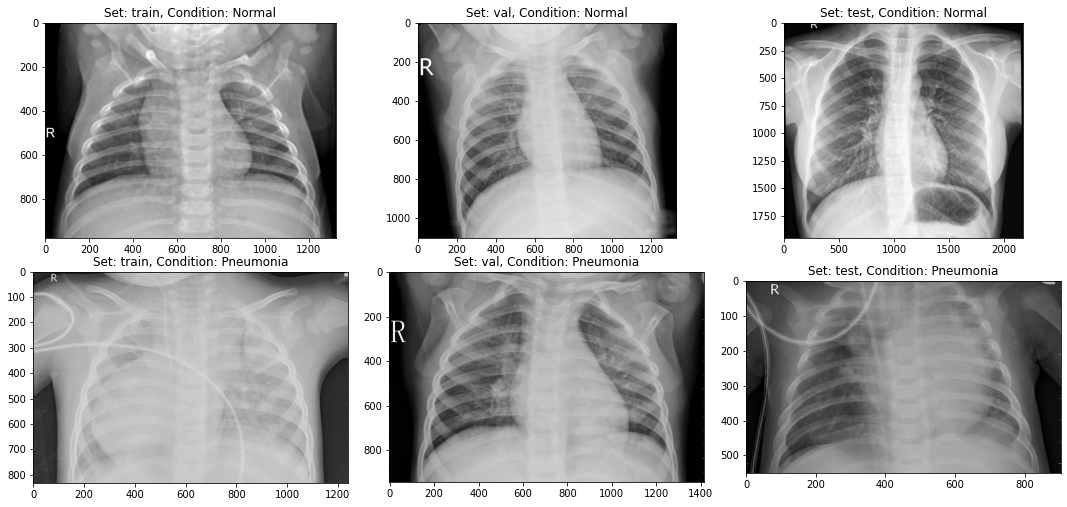

In [3]:
#sample_normal = random.sample(total_images_train_normal,6)
#f,ax = plt.subplots(2,3,figsize=(15,9))

#for i in range(0,6):
 #   im = cv2.imread('../content/drive/My Drive/chest_xray/chest_xray/train/NORMAL'+sample_normal[i])
    #ax[i//3,i%3].imshow(im)
    #ax[i//3,i%3].axis('off')
#f.suptitle('Normal Lungs')
#plt.show()
input_path = '../content/drive/My Drive/chest_xray/chest_xray/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

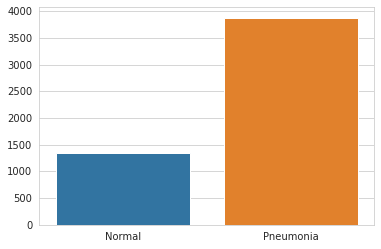

In [4]:
sns.set_style('whitegrid')
sns.barplot(x=['Normal','Pneumonia'],y=[len(total_images_train_normal),len(total_images_train_pneumonia)])

In [5]:
image_height = 150
image_width = 150
batch_size = 10
no_of_epochs  = 10

In [6]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(image_height,image_width,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 69, 69, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 64)        0

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   shear_range=0.2,
                                   zoom_range=0.2
                                   )

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
training_set = train_datagen.flow_from_directory('../content/drive/My Drive/chest_xray/chest_xray/train',
                                                 target_size=(image_width, image_height),
                                                 batch_size=batch_size,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory('../content/drive/My Drive/chest_xray/chest_xray/test',
                                            target_size=(image_width, image_height),
                                            batch_size=batch_size,
                                            class_mode='binary')

# Updated part --->
val_set = test_datagen.flow_from_directory('../content/drive/My Drive/chest_xray/chest_xray/val',
                                            target_size=(image_width, image_height),
                                            batch_size=1,
                                            shuffle=False,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [10]:
reduce_learning_rate = ReduceLROnPlateau(monitor='loss',
                                         factor=0.1,
                                         patience=2,
                                         cooldown=2,
                                         min_lr=0.00001,
                                         verbose=1)

callbacks = [reduce_learning_rate]

In [11]:
history = model.fit_generator(training_set,
                    steps_per_epoch=5216//batch_size,
                    epochs=no_of_epochs,
                    validation_data=test_set,
                    validation_steps=624//batch_size,
                    callbacks=callbacks
                   )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
521/521 [==============================] - 2499s 5s/step - loss: 0.4367 - accuracy: 0.8133 - val_loss: 0.3886 - val_accuracy: 0.8371
Epoch 2/10
521/521 [==============================] - 724s 1s/step - loss: 0.2787 - accuracy: 0.8815 - val_loss: 0.4630 - val_accuracy: 0.7629
Epoch 3/10
521/521 [==============================] - 719s 1s/step - loss: 0.2754 - accuracy: 0.8915 - val_loss: 0.3514 - val_accuracy: 0.8532
Epoch 4/10
521/521 [==============================] - 730s 1s/step - loss: 0.2189 - accuracy: 0.9145 - val_loss: 0.9479 - val_accuracy: 0.8081
Epoch 5/10
521/521 [==============================] - 726s 1s/step - loss: 0.2095 - accuracy: 0.9201 - val_loss: 0.3164 - val_accuracy: 0.9000
Epoch 6/10
521/521 [==============================] - 722s 1s/step - loss: 0.1949 - accuracy: 0.9287 - val_loss: 0.4308 - val_accuracy: 0.8306
Epoch 7/10
521/521 [==============================] - 722s 1s/ste

In [12]:
# display indices marked by the system

print(test_set.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


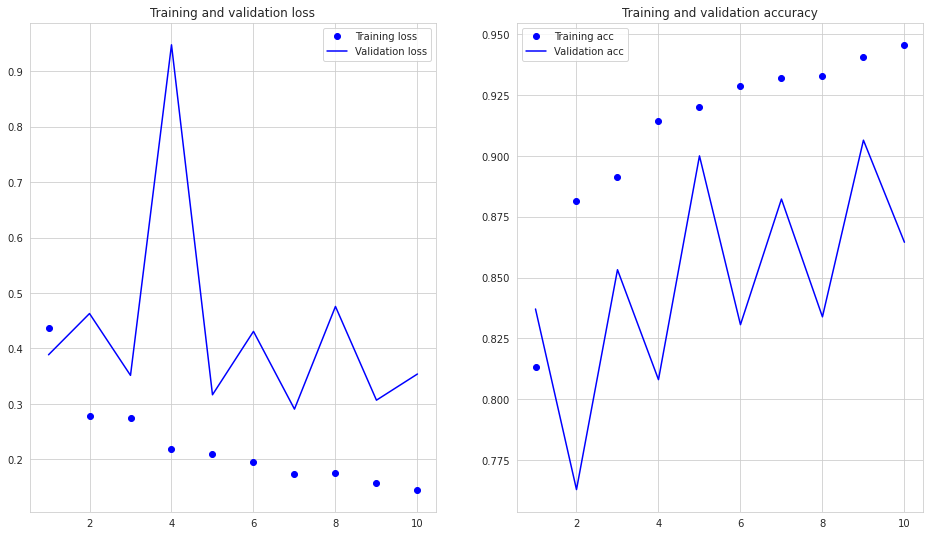

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(16,9))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

In [16]:
predictions = model.predict_generator(val_set, steps=16, verbose=1)

Instructions for updating:
Please use Model.predict, which supports generators.
16/16 [==============================] - 5s 311ms/step


In [17]:
predictions.shape

(16, 1)